In [95]:
from selenium import webdriver
from bs4 import BeautifulSoup
from webdriver_manager.chrome import ChromeDriverManager

url = 'https://hk.centanet.com/findproperty/list/buy?q=fSLmBaTXIkG9hgk4nzQWQ'

driver = webdriver.Chrome(ChromeDriverManager().install())

driver.get(url)

driver.implicitly_wait(5)

[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 89.0.4389
[WDM] - Get LATEST driver version for 89.0.4389


[WDM] - Get LATEST driver version for 89.0.4389
[WDM] - Trying to download new driver from https://chromedriver.storage.googleapis.com/89.0.4389.23/chromedriver_win32.zip
[WDM] - Driver has been saved in cache [C:\Users\aaa\.wdm\drivers\chromedriver\win32\89.0.4389.23]


In [101]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(driver.page_source, 'lxml')

In [102]:
def nextpage(driver):
    pages = driver.find_element_by_tag_name('.el-icon-arrow-right')

    driver.execute_script("arguments[0].click();", pages)

In [103]:
import pandas as pd

results = soup.find_all('a', class_ = 'property-text list')
l=[]


for i in range(1, 2):
    nextpage(driver)
    
    for result in results:
        a = result.find('div', class_ = 'title').getText()
        b = result.find('span', class_ = 'title-sm').getText()
        c = result.find('div', class_ = 'adress tag-adress').getText()
        d = result.find('div', class_ = 'adress hidden-xs-only floor-info').getText()
        e = result.find('div', class_ = 'num').getText()
        f = result.find('div', class_ = 'right-warpper').getText()
        row = [result for result in (a, b, c, d, e, f)]
        l.append(row)

df = pd.DataFrame(l, columns=["a", "b", "c", "d", "e", "f"])

In [104]:
df.head(5)

,a,b,c,d,e,f
0,\n 海堤灣畔 5座 2房\n 中層 D室,中層 D室,東涌市中心,\n 19年樓齡\n \n ...,\n 508呎\n ...,"售 $ 750萬 \n 月供 $17,780・計算按揭\n ..."
1,\n 屯門市廣場 1期 4座 \n 高層 F室,高層 F室,屯門市中心,\n 33年樓齡\n \n ...,\n 392呎\n ...,"售 $ 468萬 \n 月供 $11,094・計算按揭\n ..."
2,\n 東環 2期 1B座 3房 1套\n 低層 2室,低層 2室,東涌市中心,\n 4年樓齡\n,\n 645呎\n ...,"售 $ 840萬 \n 月供 $19,914・計算按揭\n ..."
3,\n 瓏門 1期 3座 2房\n 中層 E室,中層 E室,屯門市中心,\n 8年樓齡\n \n ...,\n 495呎\n ...,"售 $ 700萬 \n 月供 $16,595・計算按揭\n ..."
4,\n 瓏門 1期 5座 2房\n 高層 K室,高層 K室,屯門市中心,\n 8年樓齡\n \n ...,\n 475呎\n ...,"售 $ 700萬 \n 月供 $16,595・計算按揭\n ..."


In [105]:
#df.to_csv('DBA_centanet.csv')

In [32]:
import pandas as pd

df = pd.read_csv('DBA_centanet.csv', encoding='utf-8')

In [33]:
df

,Unnamed: 0,a,b,c,d,e,f
0,0,\n 南浪海灣 1座 2房\n 中層 D室,中層 D室,屯門南,\n 20年樓齡\n \n ...,\n 522呎\n ...,"售 $ 580萬 \n 月供 $13,750・計算按揭\n ..."
1,1,\n 康怡花園 C座 (9-16室) 3房\n 低層 16室,低層 16室,康怡,\n 34年樓齡\n \n ...,\n 594呎\n ...,"售 $ 1,010萬 \n 月供 $19,953・計算按揭\..."
2,2,\n 蔚然 4房 2套\n 低層 B室,低層 B室,西半山,\n 8年樓齡\n \n ...,"\n 1,589呎\n ...","$ 5,300萬 售 $ 4,700萬 \n 月供 $92,..."
3,3,\n 麗城花園 3期 5座 4房 1套\n 高層 C室,高層 C室,麗城,\n 30年樓齡\n \n ...,\n 742呎\n ...,"售 $ 920萬 \n 月供 $21,810・計算按揭\n ..."
4,4,\n 海怡半島 4 期 御庭園 御意居 (28座) 2房\n 高層 B室,高層 B室,海怡,\n 26年樓齡\n \n ...,\n 516呎\n ...,"售 $ 930萬 \n 月供 $22,047・計算按揭\n ..."
...,...,...,...,...,...,...,...
10000,10000,\n 新元朗中心 3座 \n 高層 F室,高層 F室,元朗站,\n 27年樓齡\n \n ...,\n 466呎\n ...,"售 $ 685萬 \n 月供 $16,239・計算按揭\n ..."
10001,10001,\n 維景灣畔 2期 7座 3房 1套\n 高層 F室,高層 F室,調景嶺,\n 19年樓齡\n \n ...,\n 660呎\n ...,"售 $ 1,400萬 \n 月供 $27,658・計算按揭\..."
10002,10002,\n 海典居 3座 \n 中層 A室,中層 A室,馬鞍山,\n 22年樓齡\n \n ...,\n 954呎\n ...,"售 $ 1,530萬 \n 月供 $30,226・計算按揭\..."
10003,10003,\n 屯門市廣場 2期 2座 2房\n 中層 F室,中層 F室,屯門市中心,\n 32年樓齡\n \n ...,\n 326呎\n ...,"$ 450萬 售 $ 440萬 \n 月供 $10,431・..."


In [34]:
df['Floor'] = df['b'].str.split(' ').str[0]

df['Floor'] = df['Floor'].replace({'高層':'3', '中層':'2', '低層':'1'}, regex = True)

In [35]:
df['Building_Year'] = df['d'].str.split('年樓齡').str[0]

In [36]:
df['Saleable_Area'] = df['e'].str.split('呎').str[0]

In [37]:
df['Flat_Price'] = df['f'].str.split('\n').str[0]
df['Flat_Price'] = df['Flat_Price'].str.split('售').str[1]
df['Flat_Price'] = df['Flat_Price'].replace({'\$':'', '萬':'', ',':''}, regex = True)

#Million = "0000"
#df['Flat_Price'] = [x + Million for x in df['Flat_Price']]

In [38]:
df['Number_of_Room'] = df['a'].str.split('房').str[0]
df['Number_of_Room'] = df['Number_of_Room'].str.split().str[-1] #room

In [39]:
df['Building_Name'] = df['a'].str.split().str[0]

In [40]:
df = df.replace({'\n':'', ',':'', ' ':''}, regex = True)

In [41]:
df = df.drop(columns=['Unnamed: 0', 'a', 'b', 'd', 'e', 'f'])

In [42]:
df.rename(columns = {'c':'Location'}, inplace = True)

In [43]:
df = df.drop(df[df.Number_of_Room.str.contains(r'[a-zA-Z]')].index)

In [44]:
#df = df.replace(' ', '')

In [45]:
df['Building_Year'] = df['Building_Year'].astype('int')
df['Saleable_Area'] = df['Saleable_Area'].astype('int')
df['Flat_Price'] = df['Flat_Price'].astype('int')
df['Number_of_Room'] = df['Number_of_Room'].astype('int')
df['Floor'] = df['Floor'].astype('int')

In [46]:
df

,Location,Floor,Building_Year,Saleable_Area,Flat_Price,Number_of_Room,Building_Name
0,屯門南,2,20,522,580,2,南浪海灣
1,康怡,1,34,594,1010,3,康怡花園
2,西半山,1,8,1589,4700,4,蔚然
3,麗城,3,30,742,920,4,麗城花園
4,海怡,3,26,516,930,2,海怡半島
...,...,...,...,...,...,...,...
9997,東涌市中心,1,18,485,700,2,藍天海岸
9999,將軍澳,2,15,436,830,2,君傲灣
10001,調景嶺,3,19,660,1400,3,維景灣畔
10003,屯門市中心,2,32,326,440,2,屯門市廣場


In [17]:
df.describe()

,Floor,Building_Year,Saleable_Area,Flat_Price,Number_of_Room
count,8004.000000,8004.000000,8004.000000,8004.000000,8004.00000
mean,2.166667,18.250000,611.500000,1166.250000,2.50000
std,0.799355,10.175154,311.733152,1092.689584,0.76381
min,1.000000,3.000000,326.000000,440.000000,2.00000
25%,1.750000,8.000000,482.500000,700.000000,2.00000
50%,2.000000,18.500000,512.000000,875.000000,2.00000
75%,3.000000,27.000000,610.500000,1028.750000,3.00000
max,3.000000,34.000000,1589.000000,4700.000000,4.00000


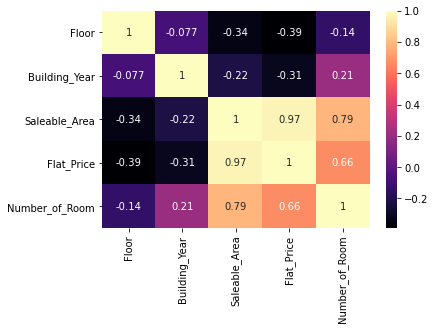

In [18]:
import seaborn as sb
from matplotlib import pyplot as plt

sb.heatmap(df.corr(), annot = True, cmap = 'magma')

plt.show()

In [19]:
import numpy as np

import pandas as pd
from pandas.api.types import CategoricalDtype

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model as lm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

Skewness: 2.759203
Kurtosis: 6.155072


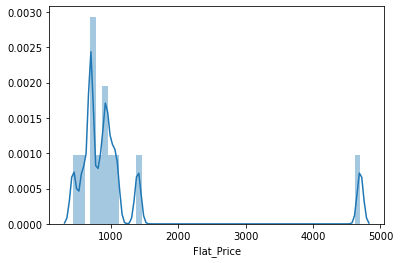

In [20]:
sns.distplot(df['Flat_Price'])

print("Skewness: %f" % df['Flat_Price'].skew())
print("Kurtosis: %f" % df['Flat_Price'].kurt())

In [47]:
from sklearn import preprocessing
from sklearn import linear_model, svm, gaussian_process
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import numpy as np

In [ ]:
from sklearn import metrics
cols = ['Number_of_Room','Saleable_Area', 'Building_Year','Floor']
x = df[cols].values
y = df['Flat_Price'].values
X_train,X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

clf = RandomForestRegressor(n_estimators=400)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(metrics.mean_squared_error(y_test,y_pred))

In [ ]:
cols = ['Number_of_Room','Saleable_Area', 'Building_Year','Floor']
x_test_value= df[cols].values
test_pre=clf.predict(x_test_value)

prediction = pd.DataFrame(test_pre, columns=['Flat_Price'])
result = pd.concat([df2['Unnamed: 0'], prediction], axis=1)
result